In [18]:
import sys
sys.path.append("/Users/carlosnavarrete/Documents/Repos/PolaPy")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from polapy.competitiveness import blais_lago, grofman_selb, election_competitiveness, laackso_taagepera
from polapy.polarization import election_polarization, esteban_ray


In [19]:
df1 = pd.DataFrame([
    ("A", 50, 1), ("B", 50, 1),
    ("A", 50, 2), ("B", 50, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 50, 5), ("B", 50, 5),
    ("A", 50, 6), ("B", 50, 6)
], columns=["candidate", "votes", "unit"])

df1 = pd.DataFrame([
    ("A", 100/3, 1), ("B", 100/3, 1), ("C", 100/3, 1),
    ("A", 100/3, 2), ("B", 100/3, 2), ("C", 100/3, 2),
    ("A", 100/3, 3), ("B", 100/3, 3), ("C", 100/3, 3),
    ("A", 100/3, 4), ("B", 100/3, 4), ("C", 100/3, 4),
    ("A", 100/3, 5), ("B", 100/3, 5), ("C", 100/3, 5),
    ("A", 100/3, 6), ("B", 100/3, 6), ("C", 100/3, 6)
], columns=["candidate", "votes", "unit"])

df1

,candidate,votes,unit
0,A,33.333333,1
1,B,33.333333,1
2,C,33.333333,1
3,A,33.333333,2
4,B,33.333333,2
5,C,33.333333,2
6,A,33.333333,3
7,B,33.333333,3
8,C,33.333333,3
9,A,33.333333,4


In [20]:
df2 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 50, 2), ("B", 50, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 50, 5), ("B", 50, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

df2 = pd.DataFrame([
    ("A", 50, 1), ("B", 50, 1), ("C", 0, 1),
    ("A", 50, 2), ("B", 50, 2), ("C", 0, 2),
    ("A", 0, 3), ("B", 50, 3), ("C", 50, 3),
    ("A", 0, 4), ("B", 50, 4), ("C", 50, 4),
    ("A", 50, 5), ("B", 0, 5), ("C", 50, 5),
    ("A", 50, 6), ("B", 0, 6), ("C", 50, 6)
], columns=["candidate", "votes", "unit"])

election_polarization(df2), election_competitiveness(df2)

/Users/carlosnavarrete/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/carlosnavarrete/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


((0.25,
    candidate  antagonism
  0         A    0.083333
  1         B    0.083333
  2         C    0.083333),
 (0.75,
    candidate  antagonism
  0         A        0.25
  1         B        0.25
  2         C        0.25))

In [21]:
df3 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 100, 2), ("B", 0, 2),
    ("A", 50, 3), ("B", 50, 3),
    ("A", 50, 4), ("B", 50, 4),
    ("A", 0, 5), ("B", 100, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

df3 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1), ("C", 0, 1),
    ("A", 100/3, 2), ("B", 100/3, 2), ("C", 100/3, 2),
    ("A", 0, 3), ("B", 100, 3), ("C", 0, 3),
    ("A", 100/3, 4), ("B", 100/3, 4), ("C", 100/3, 4),
    ("A", 0, 5), ("B", 0, 5), ("C", 100, 5),
    ("A", 100/3, 6), ("B", 100/3, 6), ("C", 100/3, 6)
], columns=["candidate", "votes", "unit"])



In [22]:
df4 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1),
    ("A", 100, 2), ("B", 0, 2),
    ("A", 100, 3), ("B", 0, 3),
    ("A", 0, 4), ("B", 100, 4),
    ("A", 0, 5), ("B", 100, 5),
    ("A", 0, 6), ("B", 100, 6)
], columns=["candidate", "votes", "unit"])

df4 = pd.DataFrame([
    ("A", 100, 1), ("B", 0, 1), ("C", 0, 1),
    ("A", 100, 2), ("B", 0, 2), ("C", 0, 2),
    ("A", 0, 3), ("B", 100, 3), ("C", 0, 3),
    ("A", 0, 4), ("B", 100, 4), ("C", 0, 4),
    ("A", 0, 5), ("B", 0, 5), ("C", 100, 5),
    ("A", 0, 6), ("B", 0, 6), ("C", 100, 6)
], columns=["candidate", "votes", "unit"])



In [23]:
output = []
for ii, frag in enumerate([df1, df2, df3, df4]):

    frag["share"] = frag.groupby("candidate", group_keys=False)["votes"].apply(lambda x: x/x.sum())

    total = frag.groupby("candidate", group_keys=False).agg({"votes": "sum"})
    total["share"] = total.apply(lambda x: x/x.sum())
    total = total.reset_index()
    item_id = f"({ii + 1})"

    output.append({
        "type": "P",
        "name": "ER (0.25)",
        "value": esteban_ray(total, pi="share", y="votes", alpha=0.25),
        "_id": item_id
    })

    output.append({
        "type": "P",
        "name": "DP",
        "value": frag.groupby("candidate").agg({"share": "std"})["share"].sum(),
        "_id": item_id
    })

    output.append({
        "type": "P",
        "name": "ED",
        "value": election_polarization(frag)[0],
        "_id": item_id
    })

    output.append({
        "type": "C",
        "name": "EC",
        "value": election_competitiveness(frag)[0],
        "_id": item_id
    })

    output.append({
        "type": "C",
        "name": "MoV",
        "value": 1,
        "_id": item_id
    })

df = pd.DataFrame(output)
df

/Users/carlosnavarrete/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/carlosnavarrete/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/carlosnavarrete/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not

,type,name,value,_id
0,P,ER (0.25),0.000000,(1)
1,P,DP,0.000000,(1)
2,P,ED,0.000000,(1)
3,C,EC,1.000000,(1)
4,C,MoV,1.000000,(1)
5,P,ER (0.25),0.000000,(2)
6,P,DP,0.387298,(2)
7,P,ED,0.250000,(2)
8,C,EC,0.750000,(2)
9,C,MoV,1.000000,(2)


/var/folders/hb/15069ggs0pj__x0wzwkvgz2h0000gn/T/ipykernel_75544/4202273158.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.pointplot(x="_id", y="value", hue="name", palette=["#e39e54", "#d64d4d", "#4d7358", "#9ed670"],
/var/folders/hb/15069ggs0pj__x0wzwkvgz2h0000gn/T/ipykernel_75544/4202273158.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x="_id", y="value", hue="name", palette=["#e39e54", "#d64d4d", "#4d7358", "#9ed670"],


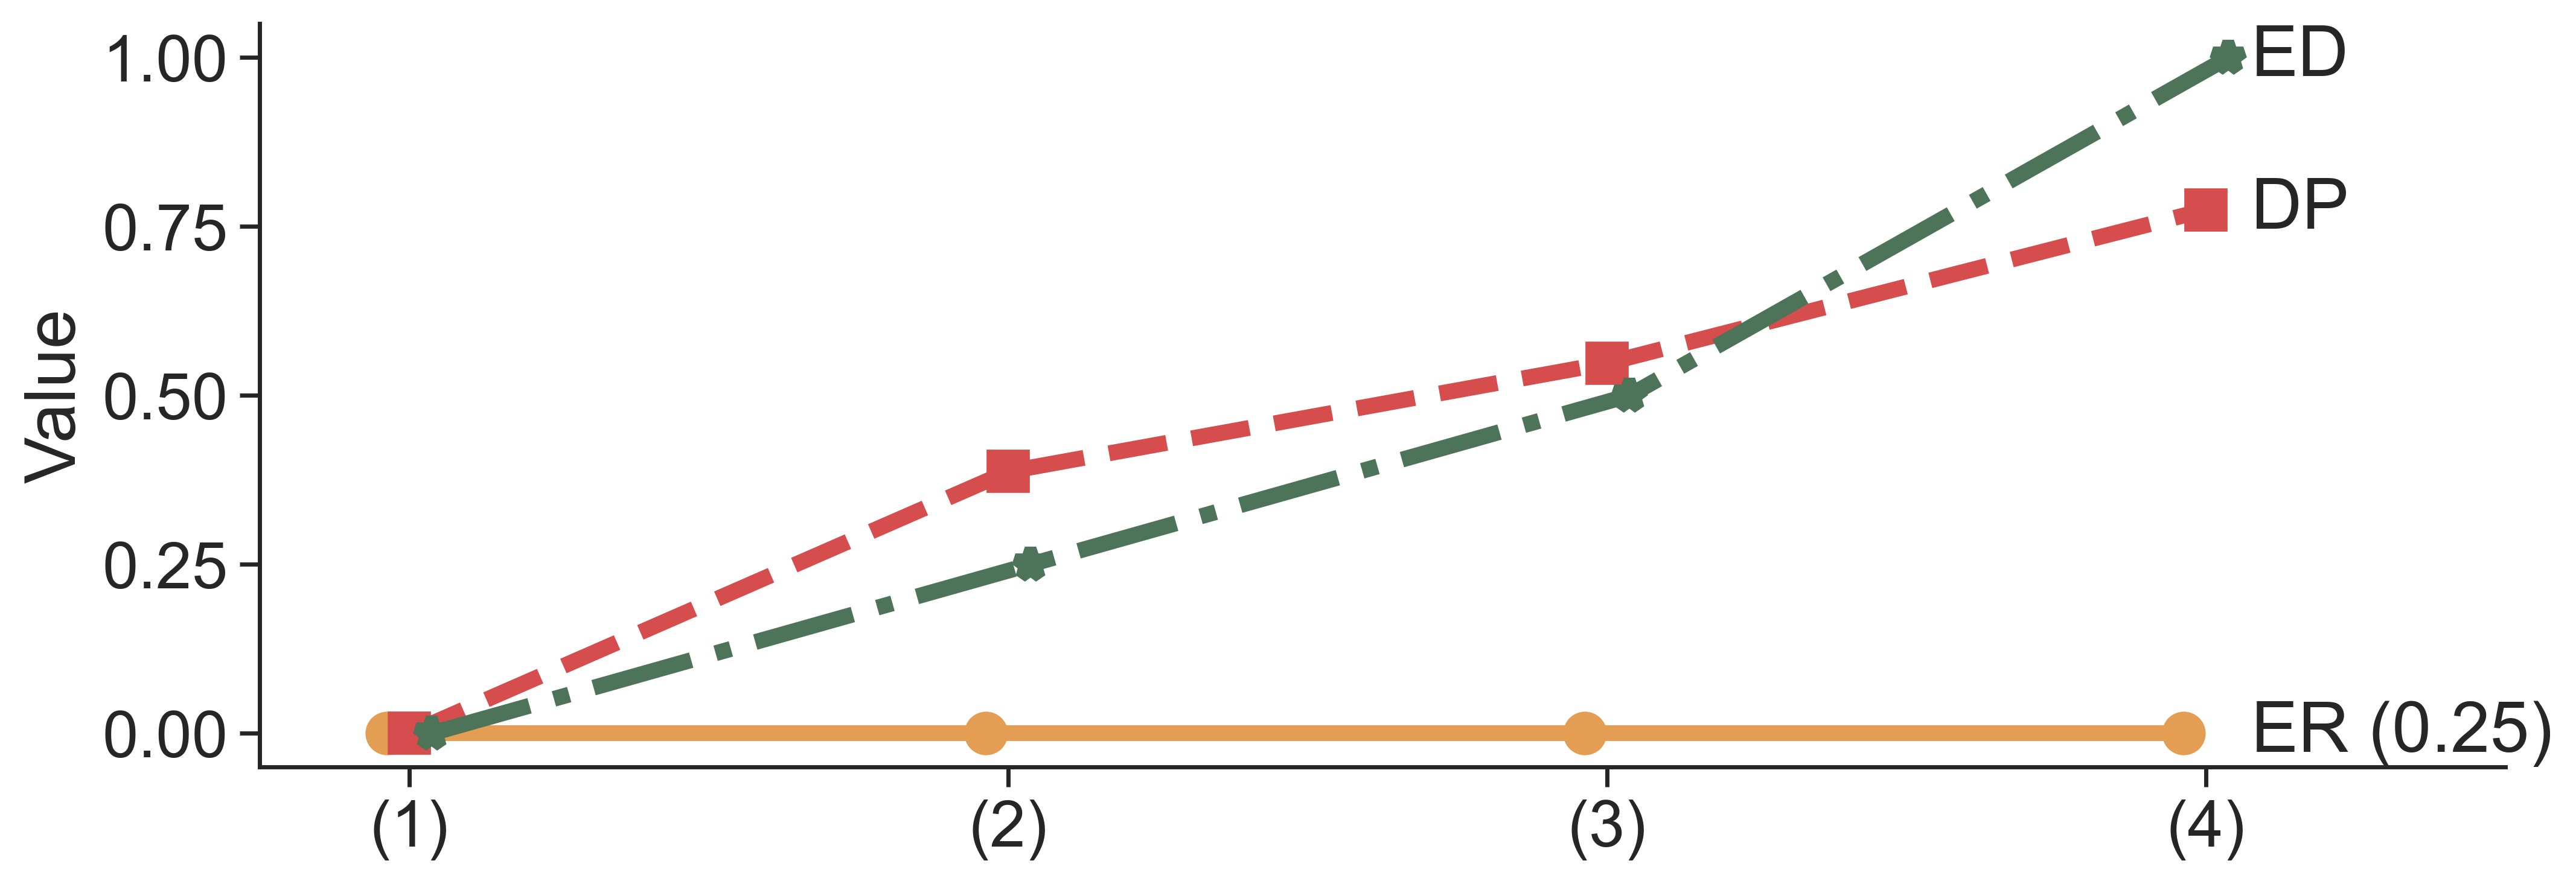

In [24]:
sns.set(font_scale=1.75, style="ticks")
fig, ax = plt.subplots(figsize=(12, 4), dpi=400)

data = df.query("type == 'P'")
sns.pointplot(x="_id", y="value", hue="name", palette=["#e39e54", "#d64d4d", "#4d7358", "#9ed670"], 
              markers=["o", "s", "*"], scale=1.75, linestyles=["-", "--", "-."], data=data, dodge=True, ax=ax)

for ii, item in data.query("_id == '(4)'").iterrows():
    ax.text(3.075, item["value"], item["name"], va="center")

ax.set_xlabel("")
ax.set_ylabel("Value")
ax.set_xbound(-0.25, 3.5)
sns.despine()
leg = ax.legend()
leg.remove()